# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [3]:
ID = 2076735
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 53 53 50 46 42 49 45 48 55]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


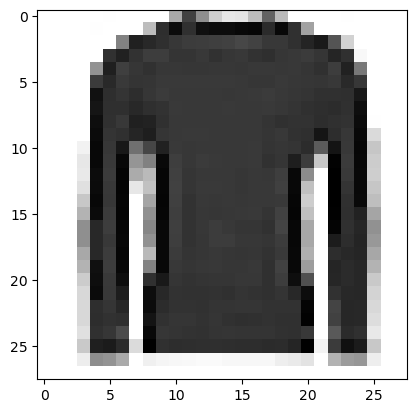

LABEL: 2
INPUT:


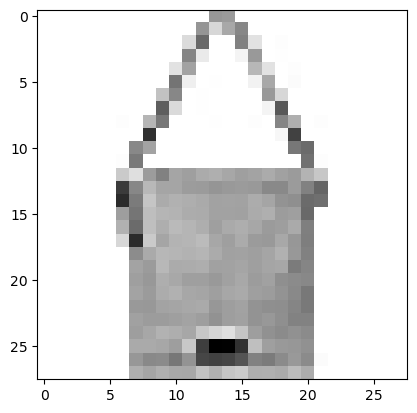

LABEL: 8
INPUT:


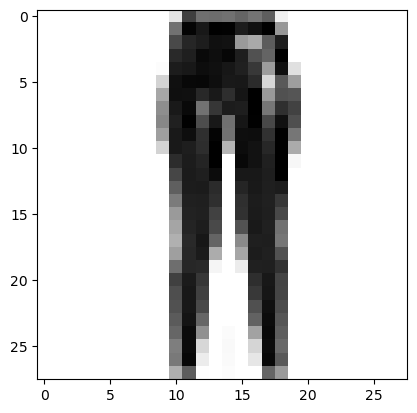

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)], }

mlp = MLPClassifier(max_iter= 300, alpha= 1e-4, solver= 'sgd', tol= 1e-4, learning_rate_init= .1, verbose= True, random_state= ID)
mlp_cv = GridSearchCV(estimator= mlp, param_grid= hl_parameters)
    
mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.37453853
Iteration 2, loss = 2.29913277
Iteration 3, loss = 2.23306113
Iteration 4, loss = 2.10671087
Iteration 5, loss = 1.95314276
Iteration 6, loss = 1.86337363
Iteration 7, loss = 1.79510387
Iteration 8, loss = 1.73264633
Iteration 9, loss = 1.67189439
Iteration 10, loss = 1.59289810
Iteration 11, loss = 1.53721485
Iteration 12, loss = 1.46631687
Iteration 13, loss = 1.41232182
Iteration 14, loss = 1.35906377
Iteration 15, loss = 1.31419026
Iteration 16, loss = 1.29198383
Iteration 17, loss = 1.25073263
Iteration 18, loss = 1.21954258
Iteration 19, loss = 1.22628674
Iteration 20, loss = 1.21997652
Iteration 21, loss = 1.14405248
Iteration 22, loss = 1.13779114
Iteration 23, loss = 1.10657095
Iteration 24, loss = 1.08998505
Iteration 25, loss = 1.06825294
Iteration 26, loss = 1.06233139
Iteration 27, loss = 1.04737924
Iteration 28, loss = 1.04572624
Iteration 29, loss = 1.01529748
Iteration 30, loss = 1.00877784
Iteration 31, loss = 0.99531349
Iteration 32, los

GridSearchCV(estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2076735, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_cv.best_params_)

print("Score with best parameters:")
print(mlp_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}
Score with best parameters:
0.772

All scores on the grid:
[0.454 0.77  0.478 0.772]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

We can see that there is a big difference between the networks using 10 neurons and the ones with 50 neurons. Using 50 neurons is the best choice.
However, there is no much difference between using 1 or 2 layers in both cases.
Looking at the best performing networks, the one with 2 layers has a score which is 0.002 higher than the one with just one layer, but this tiny improvement comes with higher complexity of the model (and therefore higher risk of overfitting).
The network with 1 layer of 50 neurons should be considered for further experiments.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

##### Attention! The network (50,) is better than the one we would get with best_estimator_: (50,50,) for the considerations above. After asking to the tutor for clarifications, I will stick to the text of the exercise.

In [10]:
#get training and test error for the best NN model from CV

mlp = mlp_cv.best_estimator_

training_error = 1-mlp.score(X_train, y_train)

test_error = 1-mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.219597


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [11]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 998,  980, 1017,  970, 1011, 1027,  968, 1041,  996,  992],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [12]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large = MLPClassifier(max_iter= 300, alpha= 1e-4, solver= 'sgd', tol= 1e-4, learning_rate_init= .1, verbose= True, random_state= ID)
mlp_large_cv = GridSearchCV(estimator= mlp_large, param_grid= hl_parameters)

mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 1.72630939
Iteration 2, loss = 0.88609539
Iteration 3, loss = 0.72261048
Iteration 4, loss = 0.64418798
Iteration 5, loss = 0.60421455
Iteration 6, loss = 0.59220363
Iteration 7, loss = 0.59130184
Iteration 8, loss = 0.54217079
Iteration 9, loss = 0.53831170
Iteration 10, loss = 0.53877203
Iteration 11, loss = 0.52263076
Iteration 12, loss = 0.51196045
Iteration 13, loss = 0.52995063
Iteration 14, loss = 0.51725553
Iteration 15, loss = 0.50754905
Iteration 16, loss = 0.49852551
Iteration 17, loss = 0.49073170
Iteration 18, loss = 0.47213080
Iteration 19, loss = 0.50992918
Iteration 20, loss = 0.47123712
Iteration 21, loss = 0.46500232
Iteration 22, loss = 0.48149091
Iteration 23, loss = 0.46915947
Iteration 24, loss = 0.48488823
Iteration 25, loss = 0.46349399
Iteration 26, loss = 0.46439134
Iteration 27, loss = 0.44674709
Iteration 28, loss = 0.46162980
Iteration 29, loss = 0.43566179
Iteration 30, loss = 0.44055139
Iteration 31, loss = 0.45239445
Iteration 32, los

GridSearchCV(estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2076735, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [13]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_cv.best_params_)

print("Score with best parameters:")
print(mlp_large_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_large_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}
Score with best parameters:
0.8472999999999999

All scores on the grid:
[0.7797 0.8412 0.7931 0.8473]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

By increasing the number of samples, the networks with 10 neurons per layer have good overall performance. However, the ones with 50 neurons still outperform the former ones.
The network (50,50,) is still performing better than (50,) but the score is better, again, only by 0.008: a negligible improvement that comes to a cost of an increased complexity and therefore higher risk of overfitting.
A network with 1 layer of 50 neurons is still the best the choice.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points.

##### As before, we pick the network returned by best_estimator_ as requested, although I would've picked the one with only one layer for what stated in TO DO 5

In [14]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv.best_estimator_

training_error = 1-best_mlp_large.score(X_train, y_train)

test_error = 1-best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.008700
Best NN test error: 0.143960


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

The best architecture does not change, it is always the one with 50 neurons in the first layer.
The training error becomes higher than 0 (87 samples in the training set were misclassified by the network with a larger training set). However, this doesn't result in a worse generalization error which, in fact, becomes lower.
For what concerns the test error, we have an improvement of 0.08 (8%). Therefore, we can say that by increasing the data in the training set, the network is able to learn better th data in our problem.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


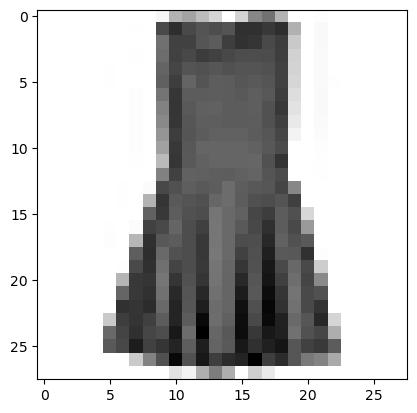

LABEL: 3
Prediction of small NN: 0
Prediction of large NN 3


In [15]:
pred_small = mlp.predict(X_test)
wrong_pred_small = pred_small != y_test

pred_large = best_mlp_large.predict(X_test)
right_pred_large = pred_large == y_test

right_large_wrong_small = np.logical_and(wrong_pred_small, right_pred_large)
#Get the indices of the positions in which you have True (the instances that we're looking for)
right_large_wrong_small_indices = [i for i, x in enumerate(right_large_wrong_small) if x]

#Plot the digit for any index inside the vector just obtained
plot_input(X_test, y_test, right_large_wrong_small_indices[0])
print("Prediction of small NN:", pred_small[right_large_wrong_small_indices[0]])
print("Prediction of large NN", pred_large[right_large_wrong_small_indices[0]])

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


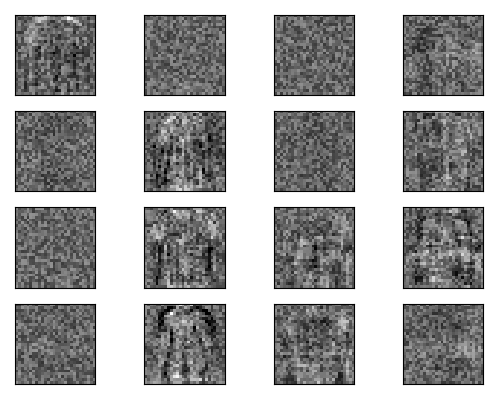

Weights with 10000 data points:


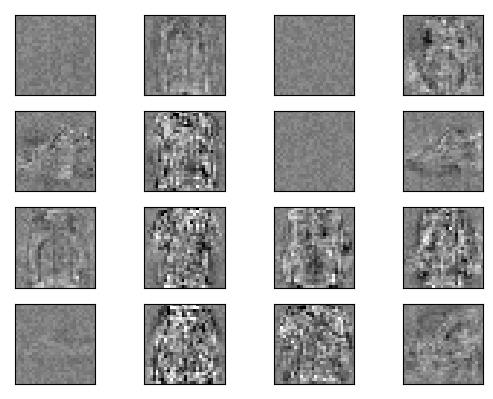

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

By looking at the weights with 10000 data points, we can see that they resemble the images in our training set.
When we compare this to the weights with only 500 data points, the images are more blurry and less defined.
We can therefore conclude that the network learned better the patterns in the model when using a larger dataset.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**RBF SVM, we need to choose C and gamma**
I chose the SVM with RBF since, from the previous homework, we know that this is the best choice when working with images (https://calculatedcontent.com/2012/02/06/kernels_part_1/: RBF kernel is similar to a low-band pass filter, which is used in Signal Processing to smooth images).

In [17]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', max_iter=300)
svm_parameters = {'gamma': [0.001, 0.01, 0.1], 'C': [1, 10, 20]}
grid_svm = GridSearchCV(estimator=svm_rbf, param_grid=svm_parameters)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_

training_error_other = 1 - best_svm.score(X_train, y_train)

test_error_other = 1 - best_svm.score(X_test, y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

print(grid_svm.best_params_)

C:\Users\albfo\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\albfo\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\albfo\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\albfo\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\albfo\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.050600
Best test error (other model): 0.143120
{'C': 10, 'gamma': 0.01}


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

Based on the results, we can say that the 2 architectures are interchangeable, the difference in terms of generalization error is around 0.08% (negligible).
However, based on the real-life application of the models, I would consider also the requirements for training and prediction time.
SVM are faster with respect to training time with big datasets since they only need to find the support vectors, while for NN, based on the number of layers and neurons, this task can be quite time-demanding due to the back-propagation step.
NN are faster in performing predictions after training since they rely on matrix multiplication, a task that can be parallelized and therefore be computed rapidly. SVMs, on the other hand, need to evaluate the kernel function K(x,x'), where x is the pattern to predict and x' the support vector, for all the support vectors. If the number of support vectors is high, then this operation would require a lot of time.

In [18]:
print("Total number of support vectors:", sum(grid_svm.best_estimator_.n_support_))

Total number of support vectors: 3828


# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [19]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [20]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [21]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)
kmeans.fit(X_train, y_train)

KMeans(n_clusters=10, random_state=2076735)

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

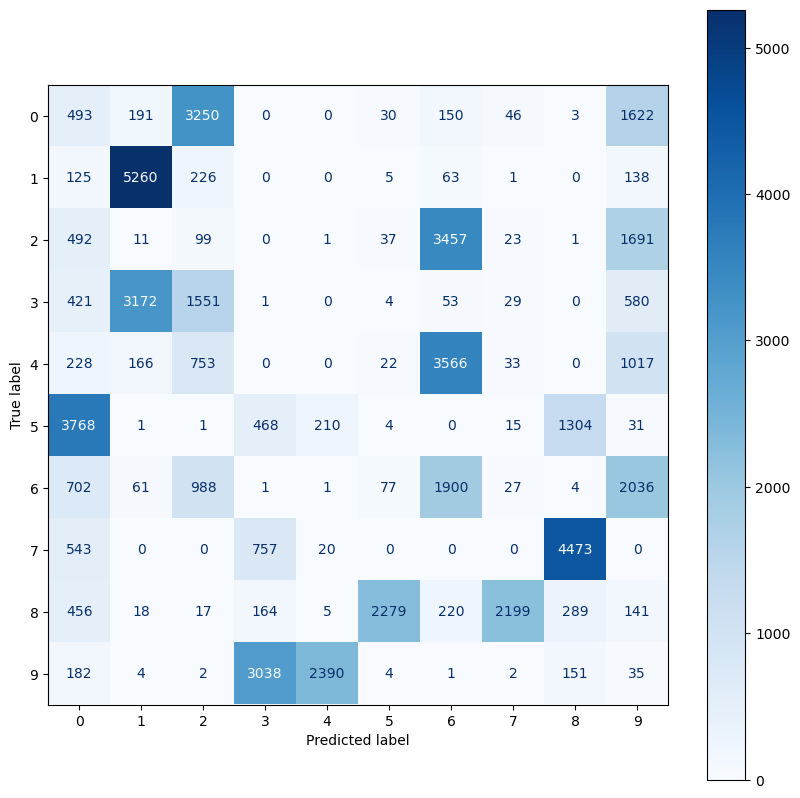

In [22]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
cm = sklearn.metrics.cluster.contingency_matrix(labels_true=y_test, labels_pred=kmeans.predict(X_test))

disp = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax = ax, cmap='Blues')

plt.show()

## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

Based on how we pick the samples in the training set, the clustering results can change a lot.
First of all, we don't expect a 1-to-1 correspondence between labels and clusters because the numbering of labels follows a specific criterion which is not known, of course, to the Lloyd's algorithm since it is an unsupervised learning method.
However, we would expect the instances to be associated strongly to just one True label e.g. All the elements that have a prediction x to be associated to the same true label y. However, this doesn't happen so let us look a bit into this.

PRINTING NOW ELEMENTS IN CLUSTER 0 



INPUT:


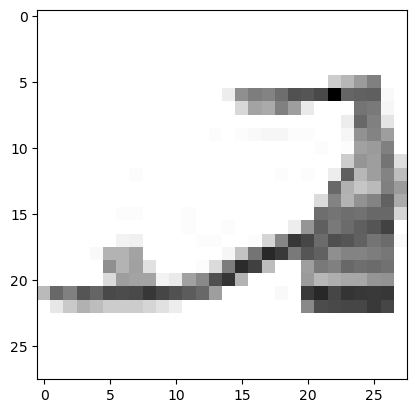

LABEL: 5
INPUT:


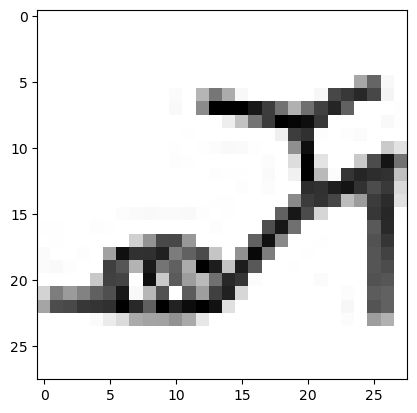

LABEL: 5
INPUT:


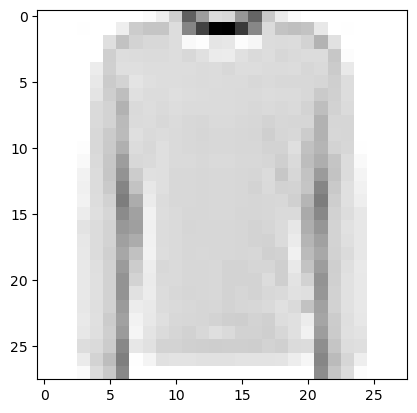

LABEL: 2
INPUT:


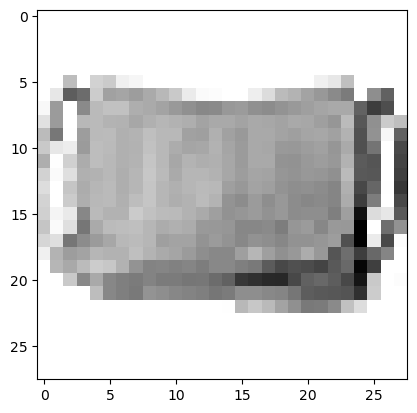

LABEL: 8
INPUT:


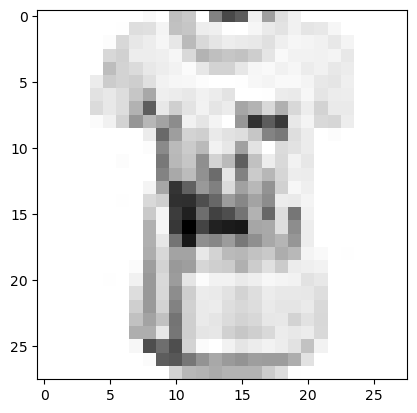

LABEL: 0


In [23]:
Z = kmeans.predict(X_train)
i=0
print("PRINTING NOW ELEMENTS IN CLUSTER", i ,"\n\n\n")
row = np.where(Z==i)[0]
for k in range(0,5):
    plot_input(X_train, y_train, row[k])
i+=1

PRINTING NOW ELEMENTS IN CLUSTER 1 



INPUT:


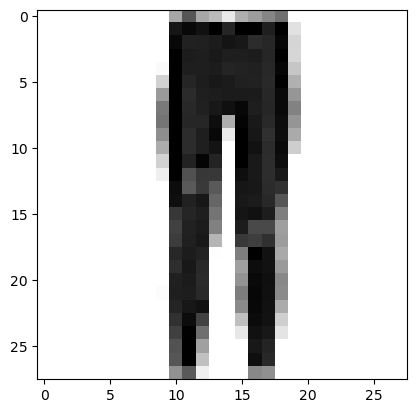

LABEL: 1
INPUT:


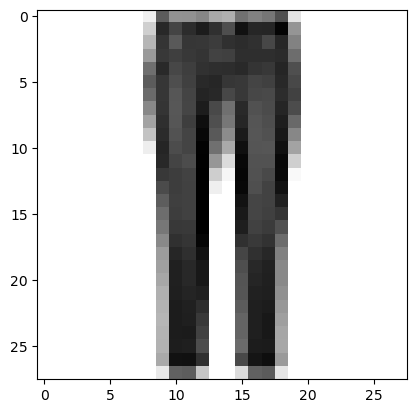

LABEL: 1
INPUT:


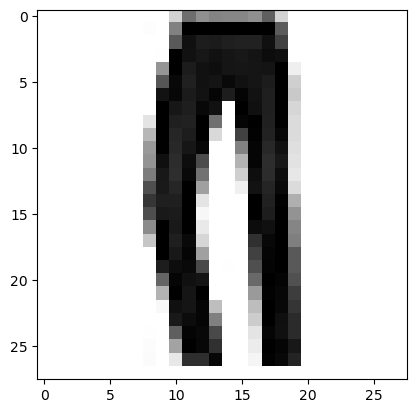

LABEL: 1
INPUT:


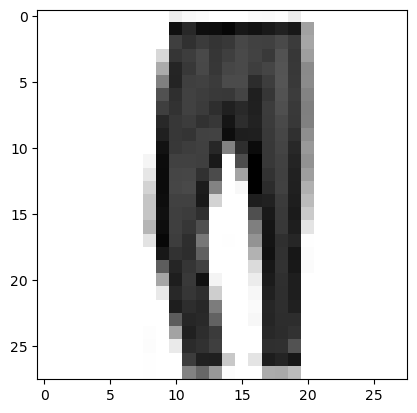

LABEL: 1
INPUT:


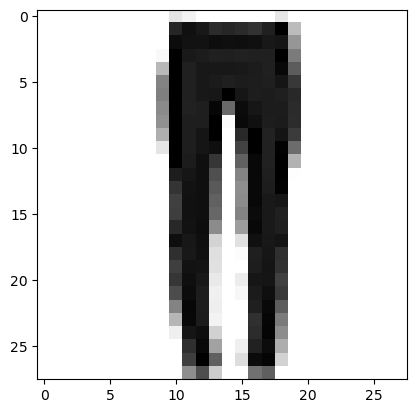

LABEL: 1
INPUT:


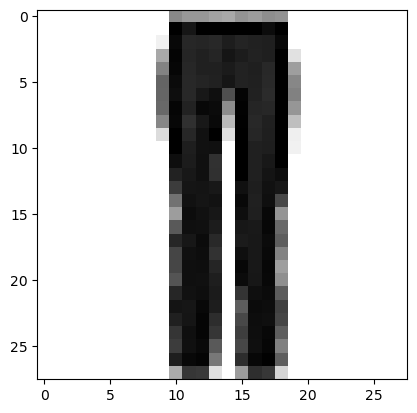

LABEL: 1
INPUT:


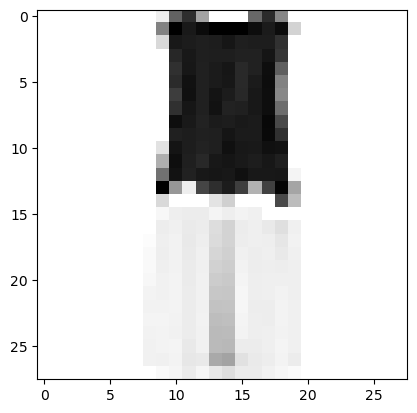

LABEL: 3
INPUT:


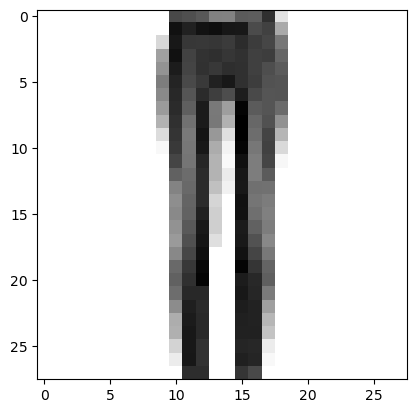

LABEL: 1
INPUT:


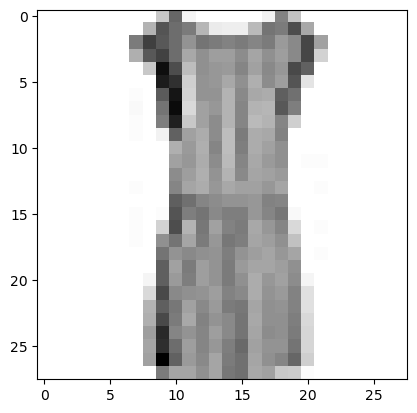

LABEL: 3
INPUT:


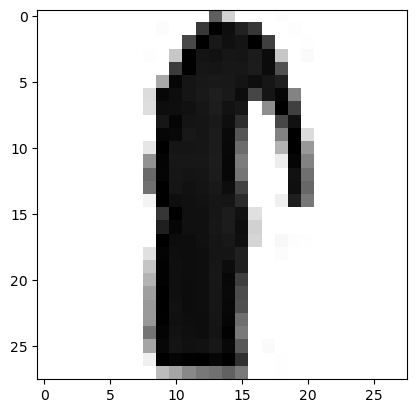

LABEL: 3


In [24]:
print("PRINTING NOW ELEMENTS IN CLUSTER", i ,"\n\n\n")
row = np.where(Z==i)[0]
for k in range(0,10):
    plot_input(X_train, y_train, row[k])
i+=1

PRINTING NOW ELEMENTS IN CLUSTER 2 



INPUT:


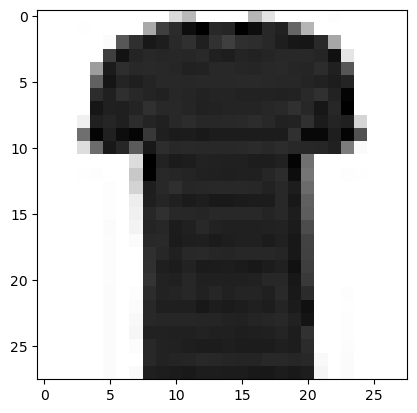

LABEL: 0
INPUT:


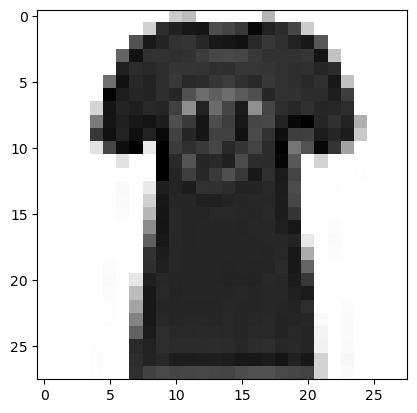

LABEL: 0
INPUT:


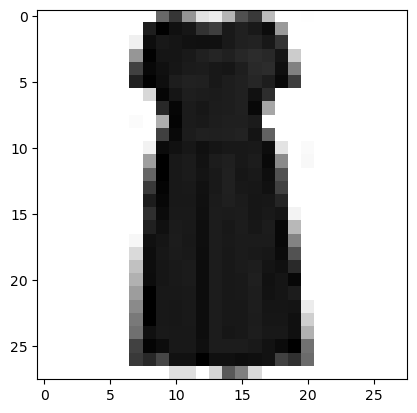

LABEL: 3
INPUT:


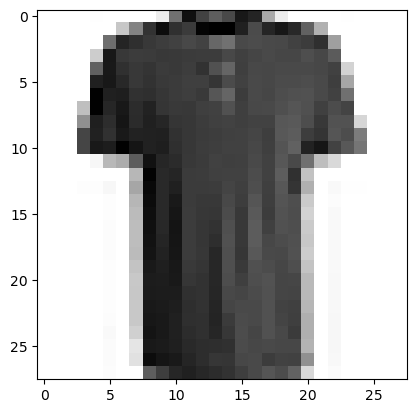

LABEL: 0
INPUT:


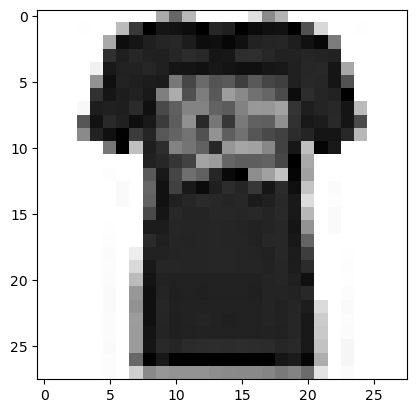

LABEL: 0
INPUT:


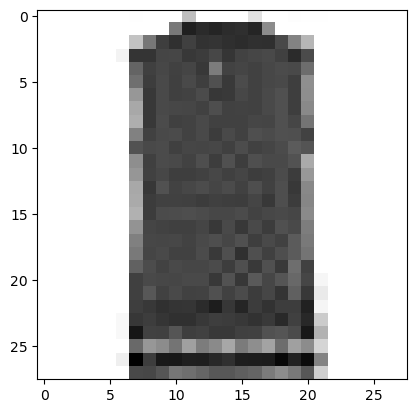

LABEL: 6
INPUT:


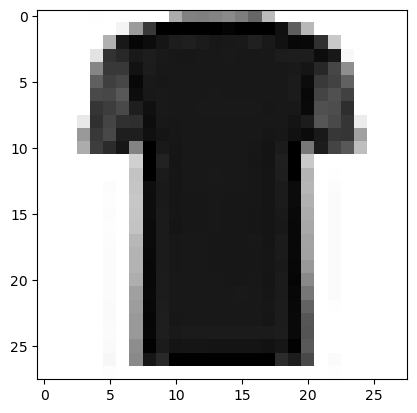

LABEL: 0
INPUT:


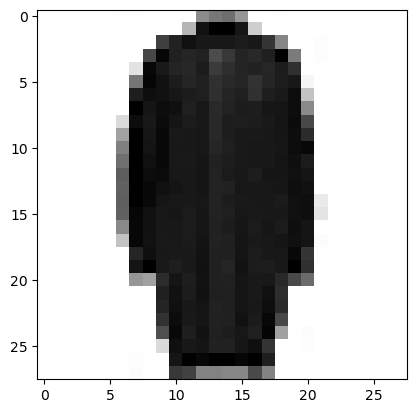

LABEL: 4
INPUT:


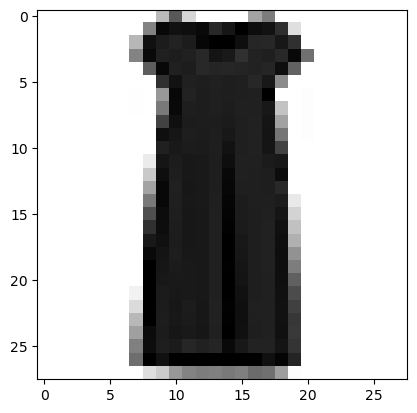

LABEL: 3
INPUT:


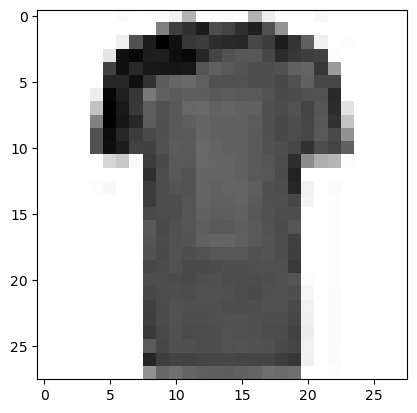

LABEL: 0


In [25]:
print("PRINTING NOW ELEMENTS IN CLUSTER", i ,"\n\n\n")
row = np.where(Z==i)[0]
for k in range(0,10):
    plot_input(X_train, y_train, row[k])
i+=1

Here we can notice an interesting behaviour: each cluster contains elements with similar colors. For example one cluster has objects with a light grey color while some others have elements that have a dark grey color. And we can see how this actually makes very much sense.

In fact, clustering belongs to the unsupervised learning tasks, therefore the labels are not considered at all when creating clusters. The only thing that is used in order to get a division of our dataset in clusters are the input instances x. Each feature of the instance is related to a pixel of the image and the value of this feature is the **color** in scale of grey [0,255] of that pixel.
Let us consider for example 2 t-shirts that use exactly the same pixels for representing the item. If one t-shirt is very dark (all the pixels close to 0) and one is very bright (all the pixels close to 255), then although they represent the same object, they would still be quite far apart in the space of features and will be assigned to different clusters.
Thus, if we imagine our patterns in the space of the features, then elements with bright pixels will be close to each other (and therefore clusterized together), while the ones with dark pixels will be farther away (and therefore clusterized together).

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [26]:
from sklearn.metrics import silhouette_score
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID)
    labels = kmeans.fit_predict(X_train, y_train)
    silhouttescore = silhouette_score(X_train, labels)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19464172985668216
Silhoutte coefficient for number of clusters=3: 0.19000293356281195
Silhoutte coefficient for number of clusters=4: 0.18586869155027433
Silhoutte coefficient for number of clusters=5: 0.15519730201116438
Silhoutte coefficient for number of clusters=6: 0.15792807969631675
Silhoutte coefficient for number of clusters=7: 0.16897254612201862
Silhoutte coefficient for number of clusters=8: 0.1645694853847215
Silhoutte coefficient for number of clusters=9: 0.16921070267309196
Silhoutte coefficient for number of clusters=10: 0.15443064928725864
Silhoutte coefficient for number of clusters=11: 0.1410484146630672
Silhoutte coefficient for number of clusters=12: 0.1380567570139403
Silhoutte coefficient for number of clusters=13: 0.1338830090960743
Silhoutte coefficient for number of clusters=14: 0.13748253262764315
Silhoutte coefficient for number of clusters=15: 0.13093518211990857


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

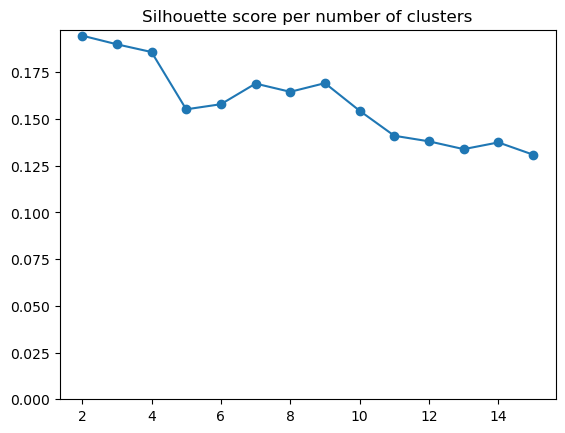

In [27]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

We know that the silhouette score is in the range [-1,1]:
  - 1: all the patterns were inserted in the correct cluster, every pattern is very far from the nearest neighboring cluster. The clusters are very dense and well separated.
  - -1: all instances are closer to the neighboring cluster rather than the one they are assigned to. The clustering was done wrongly
  - 0: the clusters are very close to each other or overlapping. We don't know to which cluster we should assign a given pattern.

In this case, we see that the higher silhouette score is reached with 2 clusters and, in that case, we have a score of 0.18, which is fairly low.
Therefore, also supported by what stated in https://web.archive.org/web/20111002220803/http://www.unesco.org:80/webworld/idams/advguide/Chapt7_1_1.htm (see table at the bottom of the page), we can say that no substantial correlation between features has been found, therefore a KMeans clustering doesn't seem to be the best option. Maybe using other types of clustering (e.g. kmeans with different type of distance or linkage based clustering) we can find some better separation of the data.

I will still try to explain the results even though there could be no meaning behind them.
We see that there is a significant drop from k=4 and k=5, so k=4 seems to be a nice choice. This doesn't match what we were expecting from our prior knowledge of the data (we have 10 classes).
However, if we look into the labels, we can find 4 macro categories: tops (t-shirt, cardigan, dress, coat, shirt), shoes (sneakers, sandals, ankle boots), bag, trousers. Anyway, for what we stated before, it could also be that patterns are classified only according to their colors and we could thus conclude that there are around 4 main shades of grey in the dataset, but this is just an assumption.